In [3]:
import zipfile
import os

# Specify the zip file name
zip_file = 'archive (3).zip'

# Specify the destination folder
extract_folder = './my_subfolder'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List the contents of the extracted folder
extracted_files = os.listdir(extract_folder)
print(f"Extracted files: {extracted_files}")

Extracted files: ['paper', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images', 'scissors']


In [4]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import cv2
import os
from tqdm import tqdm  # Optional: Progress bar for visual feedback

# Define the destination folder for processed images
processed_folder = './processed_images/'

# Create the processed folder if it doesn't exist
os.makedirs(processed_folder, exist_ok=True)

# Define the folders containing rock, paper, and scissor images
folders = ['rock', 'paper', 'scissors']

# Resize images to 60x40 and convert to grayscale
target_width = 60

# Calculate the corresponding target height to maintain the aspect ratio
target_height = int((2/3) * target_width)


for folder in folders:
    folder_path = os.path.join('./my_subfolder', folder)
    
    # Create a subfolder in the processed folder for each category
    processed_category_folder = os.path.join(processed_folder, folder)
    os.makedirs(processed_category_folder, exist_ok=True)

    # List all files in the current category folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Process each image in the current category
    for image_file in tqdm(image_files, desc=f"Processing {folder} images"):
        # Read the original image
        image_path = os.path.join(folder_path, image_file)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image while maintaining the aspect ratio
        resized_image = cv2.resize(original_image, (target_width, target_height))

        # Save the processed image to the destination folder
        processed_image_path = os.path.join(processed_category_folder, image_file)
        cv2.imwrite(processed_image_path, resized_image)
    
print("Image processing completed.")

Processing scissors images: 100%|███████████████████████████████████████████████████| 750/750 [00:01<00:00, 570.21it/s]

Image processing completed.


In [1]:
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
# Define the path to the processed_images folder
processed_folder = './processed_images/'

# Define the categories (subfolders) in the processed_images folder
categories = ['rock', 'scissors', 'paper']

# Initialize lists to store flattened images and corresponding labels
all_images = []
labels = []

# Loop through each category
for category in categories:
    category_folder = os.path.join(processed_folder, category)

    # Loop through each image in the category folder
    for image_file in os.listdir(category_folder):
        if image_file.endswith('.png'):
            # Load the image in grayscale
            image_path = os.path.join(category_folder, image_file)
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            all_images.append(grayscale_image)

            # Append the corresponding label (category index) to the labels list
            labels.append(categories.index(category))

# Convert lists to NumPy arrays
all_images_array = np.array(all_images)
labels_array = np.array(labels)           
            
# Use train_test_split to split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    all_images_array,  # Features (flattened images)
    labels_array,  # Labels (category indices)
    test_size=0.2,  # 80% training, 20% testing
    stratify=labels_array,  # Ensure same class distribution in both sets
)

# Print the shapes of the resulting sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (1750, 40, 60)
Shape of x_test: (438, 40, 60)
Shape of y_train: (1750,)
Shape of y_test: (438,)


In [2]:
def preprocess_image(image, vertical_flip_prob=0.5, horizontal_flip_prob=0.5, noise_mean=0, noise_std=0.05):
    # Apply Vertical Flip with probability p
    if np.random.rand() < vertical_flip_prob:
        image = cv2.flip(image, 0)

    # Apply Horizontal Flip with probability p
    if np.random.rand() < horizontal_flip_prob:
        image = cv2.flip(image, 1)
    
   
    image = image/255.0
    # Add Gaussian noise
    noise = np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape)
    noise = noise.astype(image.dtype)
    noisy_image = np.clip(image + noise, 0, 1)


    return noisy_image

# Example usage:
# Load your image using cv2.imread() or any other method
# Assuming 'loaded_image' is your loaded image
# Make sure to adjust the file path accordingly


# Preprocess the image
#preprocessed_image = preprocess_image(x_test[0])

# Display the original and preprocessed images for comparison
#cv2.imshow("Original Image", x_test[0])
#v2.imshow("Preprocessed Image", preprocessed_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [3]:
import numpy as np

# Define the path to the processed_images folder
processed_folder = './processed_images/'

# Define the categories (subfolders) in the processed_images folder
categories = ['rock', 'scissors', 'paper']

# Initialize lists to store flattened images and corresponding labels
flattened_images = []
labels = []


x_train_flattened = x_train.reshape(len(x_train),-1)

# Convert lists to NumPy arrays
flattened_images_array = np.array(flattened_images)

x_train_flattened  = x_train_flattened/255.0
# Print the shapes of the arrays
print("Shape of flattened_images_array:", x_train_flattened.shape)
print("Shape of labels_array:", y_train.shape)

Shape of flattened_images_array: (1750, 2400)
Shape of labels_array: (1750,)


In [21]:
unique_labels_test, label_counts_test = np.unique(y_test, return_counts=True)

# Print the unique labels and their frequencies
print("Unique labels in y_test:", unique_labels_test)
print("Label frequencies in y_test:", label_counts_test)

Unique labels in y_test: [0 1 2]
Label frequencies in y_test: [145 150 143]


In [39]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Define the parameter grid for the grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50],
    'gamma': [0.001, 0.01, 0.1, 1],
}

# Create an SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(x_train_flattened, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_svm_model = grid_search.best_estimator_


Best Hyperparameters: {'C': 10, 'gamma': 0.1}


In [10]:
#RANDOM FOREST
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define the Random Forest classifier
rf_model = RandomForestClassifier()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [10, 25, 50, 100, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_flattened, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_


KeyboardInterrupt: 

In [13]:
x_test_flattened = x_test.reshape(len(x_test),-1)


x_test_flattened  = x_test_flattened/255.0
# Make predictions on the test set
y_pred = best_rf_model.predict(x_test_flattened)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.9611872146118722


In [26]:
x_test_flattened.shape

(438, 2400)

In [4]:
#NEURAL NETWORK
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy
# Function to create the model
def create_model():
    model = Sequential([
        Flatten(input_shape=(2400,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on your function
keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the parameters for grid search
param_grid = {
    'epochs': [10, 20, 50 , 100],
    'batch_size': [32, 64],
}

# Perform grid search
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train.reshape(len(x_train),-1), y_train)

# Print the best parameters and results
print("Best parameters found: ", grid_result.best_params_)

C:\Users\YORGOS\AppData\Local\Temp\ipykernel_22796\2745186027.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best parameters found:  {'batch_size': 64, 'epochs': 100}


In [5]:
best_model_cnn = grid_result.best_estimator_

In [119]:
x_train.reshape(len(x_train),-1).shape

(1750, 2400)

In [107]:
model_nn

In [ ]:
MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100)

In [105]:
best_dense_model

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100)

In [53]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Build the CNN model
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(40, 60, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train_reshaped = x_train.reshape(-1, 40, 60, 1)
# Train the model
model_cnn.fit(x_train_reshaped, y_train, epochs=100, batch_size=32,verbose=0)


In [92]:
y_train.shape

(1750,)

Give the number of rounds: 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


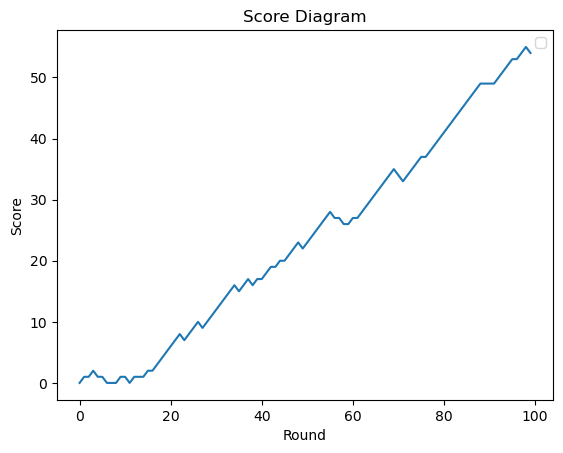

In [101]:
import numpy as np
import cv2
t = []
score_l = []
n = input('Give the number of rounds: ')
choices = ['rock', 'scissors', 'paper']
score = 0
right_recognition = 0
wrong_recognition = 0
txt = 'results_svm_rbf.txt'
with open(txt,'w') as f:
    for i in range(int(n)):
        r = np.random.randint(0, len(x_test))
        preprocessed_image = preprocess_image(x_test[r])
        r_label = y_test[r]

        pred = best_svm_model.predict(preprocessed_image.flatten().reshape(1,-1))[0]
        print('',file=f)
        print(f'Round {i+1}',file=f)
        t.append(i)
        if pred == 0:
            my_agent = 2
        elif pred == 1:
            my_agent = 0
        else:
            my_agent = 1

        if r_label == pred:
            print('Right recognition',file=f)
            score += 1
            right_recognition+=1
        else:
            print('Wrong recognition',file=f)
            wrong_recognition+=1
            if my_agent != r_label:
                score -= 1
        score_l.append(score)
        print(f"The prediction of my agent is '{choices[pred]}'",file=f)


        print(f"The choice of the random agent is '{choices[r_label]}'",file=f)

        print(10*"=="+'end of round'+10*"==",file=f)
    
    print('',file=f)
    print(f'The score of agent is {score}',file=f)
    print(f'Right recognitions are {right_recognition}',file=f)
    print(f'Wrong recognitions are {wrong_recognition}',file=f)
# Plotting the data
plt.plot(t, score_l)

# Adding labels to the axes
plt.xlabel('Round')
plt.ylabel('Score')

# Adding a title to the plot
plt.title('Score Diagram')

# Adding a legend (optional)
plt.legend()

Give the number of rounds: 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


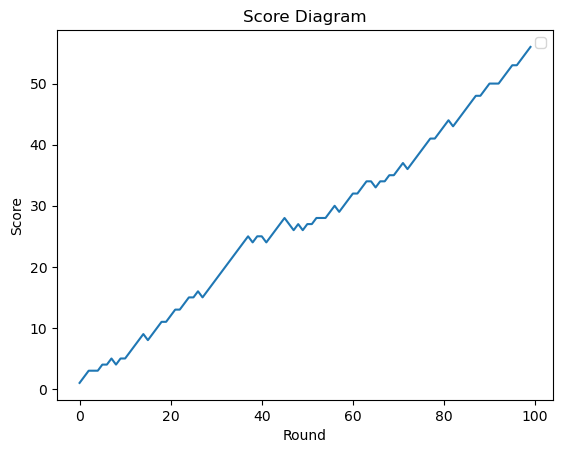

In [102]:
import numpy as np
import cv2
t = []
score_l = []
n = input('Give the number of rounds: ')
choices = ['rock', 'scissors', 'paper']
score = 0
right_recognition = 0
wrong_recognition = 0
txt = 'results_random_forest.txt'
with open(txt,'w') as f:
    for i in range(int(n)):
        r = np.random.randint(0, len(x_test))
        preprocessed_image = preprocess_image(x_test[r])
        r_label = y_test[r]

        pred = best_rf_model.predict(preprocessed_image.flatten().reshape(1,-1))[0]
        print('',file=f)
        print(f'Round {i+1}',file=f)
        t.append(i)
        if pred == 0:
            my_agent = 2
        elif pred == 1:
            my_agent = 0
        else:
            my_agent = 1

        if r_label == pred:
            print('Right recognition',file=f)
            score += 1
            right_recognition+=1
        else:
            print('Wrong recognition',file=f)
            wrong_recognition+=1
            if my_agent != r_label:
                score -= 1
        score_l.append(score)
        print(f"The prediction of my agent is '{choices[pred]}'",file=f)


        print(f"The choice of the random agent is '{choices[r_label]}'",file=f)

        print(10*"=="+'end of round'+10*"==",file=f)
    
    print('',file=f)
    print(f'The score of agent is {score}',file=f)
    print(f'Right recognitions are {right_recognition}',file=f)
    print(f'Wrong recognitions are {wrong_recognition}',file=f)
# Plotting the data
plt.plot(t, score_l)

# Adding labels to the axes
plt.xlabel('Round')
plt.ylabel('Score')

# Adding a title to the plot
plt.title('Score Diagram')

# Adding a legend (optional)
plt.legend()

In [31]:
preprocessed_image.flatten().reshape(1,-1).shape

(1, 2400)

In [34]:
best_rf_model.predict(preprocessed_image.flatten().reshape(1,-1))[0]

2

Give the number of rounds: 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


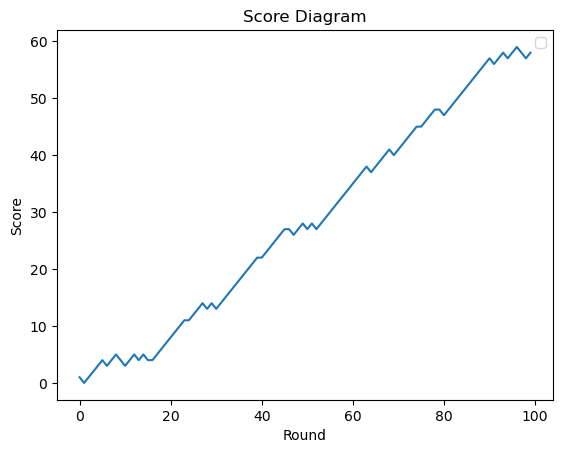

In [55]:
import numpy as np
import cv2
t = []
score_l = []
n = input('Give the number of rounds: ')
choices = ['rock', 'scissors', 'paper']
score = 0
right_recognition = 0
wrong_recognition = 0
txt = 'results_neural_network.txt'
with open(txt,'w') as f:
    for i in range(int(n)):
        r = np.random.randint(0, len(x_test))
        preprocessed_image = preprocess_image(x_test[r])
        r_label = y_test[r]

        pred = np.argmax(model_nn.predict(preprocessed_image.flatten().reshape(1, -1), verbose=0))
        print('',file=f)
        print(f'Round {i+1}',file=f)

        if pred == 0:
            my_agent = 2
        elif pred == 1:
            my_agent = 0
        else:
            my_agent = 1
        
        t.append(i)
        if r_label == pred:
            print('Right recognition',file=f)
            score += 1
            right_recognition+=1
        else:
            print('Wrong recognition',file=f)
            wrong_recognition+=1
            if my_agent != r_label:
                score -= 1
        score_l.append(score)
        print(f"The prediction of my agent is '{choices[pred]}'",file=f)


        print(f"The choice of the random agent is '{choices[r_label]}'",file=f)

        print(10*"=="+'end of round'+10*"==",file=f)
    
    print('',file=f)
    print(f'The score of agent is {score}',file=f)
    print(f'Right recognitions are {right_recognition}',file=f)
    print(f'Wrong recognitions are {wrong_recognition}',file=f)
# Plotting the data
plt.plot(t, score_l)

# Adding labels to the axes
plt.xlabel('Round')
plt.ylabel('Score')

# Adding a title to the plot
plt.title('Score Diagram')

# Adding a legend (optional)
plt.legend()

In [4]:
import matplotlib.pyplot as plt

Give the number of rounds: 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


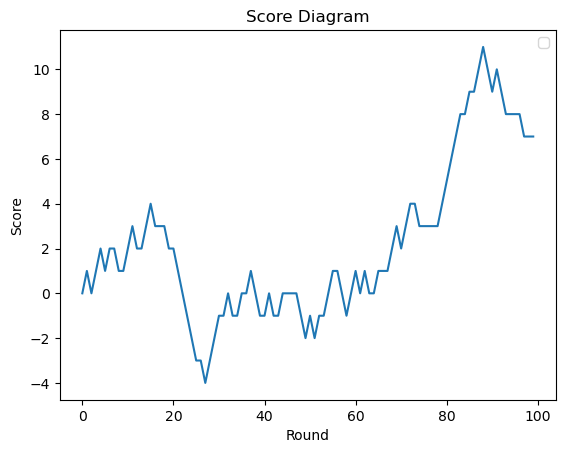

In [56]:
import numpy as np
import cv2

n = input('Give the number of rounds: ')
choices = ['rock', 'scissors', 'paper']
score = 0
right_recognition = 0
wrong_recognition = 0
txt = 'results_cnn.txt'
t = []
score_l = []
with open(txt,'w') as f:
    for i in range(int(n)):
        r = np.random.randint(0, len(x_test))
        preprocessed_image = preprocess_image(x_test[r])
        r_label = y_test[r]

        pred = np.argmax(model_cnn.predict(preprocessed_image.reshape(1, 40, 60, 1), verbose=0))
        print('',file=f)
        print(f'Round {i+1}',file=f)

        if pred == 0:
            my_agent = 2
        elif pred == 1:
            my_agent = 0
        else:
            my_agent = 1
        
        t.append(i)
        
        if r_label == pred:
            print('Right recognition',file=f)
            score += 1
            right_recognition+=1
        else:
            print('Wrong recognition',file=f)
            wrong_recognition+=1
            if my_agent != r_label:
                score -= 1
        score_l.append(score)
        print(f"The prediction of my agent is '{choices[pred]}'",file=f)


        print(f"The choice of the random agent is '{choices[r_label]}'",file=f)

        print(10*"=="+'end of round'+10*"==",file=f)
    
    print('',file=f)
    print(f'The score of agent is {score}',file=f)
    print(f'Right recognitions are {right_recognition}',file=f)
    print(f'Wrong recognitions are {wrong_recognition}',file=f)
# Plotting the data
plt.plot(t, score_l)

# Adding labels to the axes
plt.xlabel('Round')
plt.ylabel('Score')

# Adding a title to the plot
plt.title('Score Diagram')

# Adding a legend (optional)
plt.legend()



Give the number of rounds: 100
1/1 [==============================] - 0s 16ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


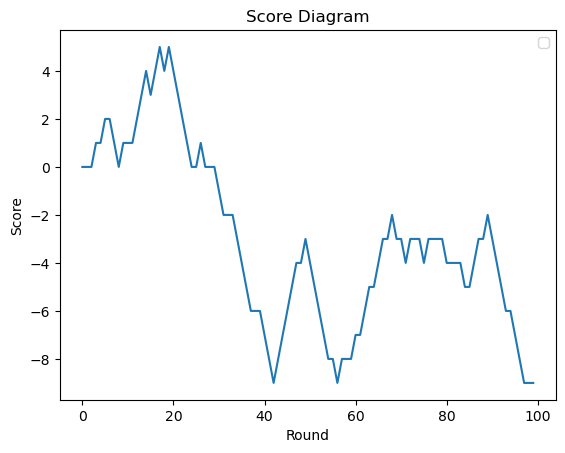

In [9]:
import numpy as np
import cv2

n = input('Give the number of rounds: ')
choices = ['rock', 'scissors', 'paper']
score = 0
right_recognition = 0
wrong_recognition = 0
txt = 'results_cnn.txt'
t = []
score_l = []
with open(txt,'w') as f:
    for i in range(int(n)):
        r = np.random.randint(0, len(x_test))
        preprocessed_image = preprocess_image(x_test[r])
        r_label = y_test[r]

        pred = np.argmax(best_model_cnn.predict(preprocessed_image.reshape(1, 2400)))
        print('',file=f)
        print(f'Round {i+1}',file=f)

        if pred == 0:
            my_agent = 2
        elif pred == 1:
            my_agent = 0
        else:
            my_agent = 1
        
        t.append(i)
        
        if r_label == pred:
            print('Right recognition',file=f)
            score += 1
            right_recognition+=1
        else:
            print('Wrong recognition',file=f)
            wrong_recognition+=1
            if my_agent != r_label:
                score -= 1
        score_l.append(score)
        print(f"The prediction of my agent is '{choices[pred]}'",file=f)


        print(f"The choice of the random agent is '{choices[r_label]}'",file=f)

        print(10*"=="+'end of round'+10*"==",file=f)
    
    print('',file=f)
    print(f'The score of agent is {score}',file=f)
    print(f'Right recognitions are {right_recognition}',file=f)
    print(f'Wrong recognitions are {wrong_recognition}',file=f)
# Plotting the data
plt.plot(t, score_l)

# Adding labels to the axes
plt.xlabel('Round')
plt.ylabel('Score')

# Adding a title to the plot
plt.title('Score Diagram')

# Adding a legend (optional)
plt.legend()


In [14]:
x_test_flattened.shape

NameError: name 'x_test_flattened' is not defined

In [15]:
#KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search

n_neighbors = [3, 5, 7, 10]
weights = ['uniform', 'distance']
p_s = [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
best_accuracy = -1
for nn in n_neighbors:
    for weight in weights:
        for p in p_s:
            # Create KNN classifier with current hyperparameters
            knn = KNeighborsClassifier(n_neighbors=nn, weights=weight, p=p)
            
            # Train the model
            knn.fit(x_train_flattened, y_train)
            
            # Make predictions on the test set
            y_pred = knn.predict(x_test.reshape(len(x_test),-1))
            
            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            
            # Update best configuration if the current one is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_config = {'n_neighbors': nn, 'weights': weight, 'p': p}

# Print the best configuration and accuracy
print("Best Configuration:", best_config)
print("Best Accuracy:", best_accuracy)

Best Configuration: {'n_neighbors': 10, 'weights': 'distance', 'p': 2}
Best Accuracy: 0.3378995433789954


Give the number of rounds: 100


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


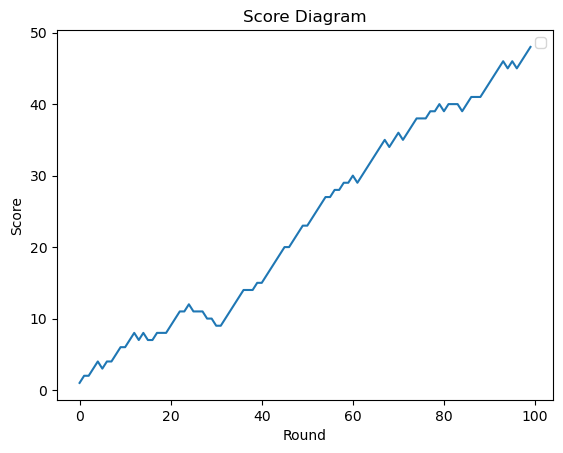

In [7]:
import numpy as np
import cv2
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
n = input('Give the number of rounds: ')
choices = ['rock', 'scissors', 'paper']
score = 0
right_recognition = 0
wrong_recognition = 0
txt = 'results_knn.txt'
t = []
score_l = []
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)
knn.fit(x_train_flattened,y_train)
with open(txt,'w') as f:
    for i in range(int(n)):
        r = np.random.randint(0, len(x_test))
        preprocessed_image = preprocess_image(x_test[r])
        r_label = y_test[r]
        
        pred = knn.predict(preprocessed_image.reshape(1,2400))[0]
        print('',file=f)
        print(f'Round {i+1}',file=f)

        if pred == 0:
            my_agent = 2
        elif pred == 1:
            my_agent = 0
        else:
            my_agent = 1
        
        t.append(i)
        
        if r_label == pred:
            print('Right recognition',file=f)
            score += 1
            right_recognition+=1
        else:
            print('Wrong recognition',file=f)
            wrong_recognition+=1
            if my_agent != r_label:
                score -= 1
        score_l.append(score)
        print(f"The prediction of my agent is '{choices[pred]}'",file=f)


        print(f"The choice of the random agent is '{choices[r_label]}'",file=f)

        print(10*"=="+'end of round'+10*"==",file=f)
    
    print('',file=f)
    print(f'The score of agent is {score}',file=f)
    print(f'Right recognitions are {right_recognition}',file=f)
    print(f'Wrong recognitions are {wrong_recognition}',file=f)
# Plotting the data
plt.plot(t, score_l)

# Adding labels to the axes
plt.xlabel('Round')
plt.ylabel('Score')

# Adding a title to the plot
plt.title('Score Diagram')

# Adding a legend (optional)
plt.legend()


In [11]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:

rf_model = RandomForestClassifier(max_depth = 20,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 200)
rf_model.fit(x_train_flattened,y_train)
image_ch = ['rock','scissors','paper']
folder_path = './'
for ch in image_ch:
    image_file = f'{ch}.jpg'
    image_path = os.path.join(folder_path, image_file)
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    target_width = 60
    target_height = 40

    # Resize the image while maintaining the aspect ratio
    resized_image = cv2.resize(original_image, (target_width, target_height))
    pred = rf_model.predict(resized_image.flatten().reshape(1, -1))
    
    if ch =='rock' and pred == 0:
        print('ok with the rock')
    elif ch =='scissors' and pred == 1:
        print('ok with the scissors')
    elif ch =='paper' and pred == 2:
        print('ok with the paper')

ok with the paper


In [59]:
original_image.shape

(589, 325)

In [62]:
resized_image.shape

(108, 60)

In [73]:
resized_image_n = resized_image/255.0

In [74]:
pred = np.argmax(model_nn.predict(resized_image_n.flatten().reshape(1, -1), verbose=0))

In [75]:
pred

0

In [18]:
pip uninstall scikit-learn

^C
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
